In [3]:
from google.cloud import storage
import io
from io import StringIO, BytesIO
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [4]:
# reading data
gcs_path = "gs://edosa_spotify_project/landing.<csv>"

In [9]:
import gcsfs
fs = gcsfs.GCSFileSystem()
print(fs.ls('edosa_spotify_project/landing'))

['edosa_spotify_project/landing/universal_top_spotify_songs.csv']


In [12]:
gcs_path = "gs://edosa_spotify_project/landing/universal_top_spotify_songs.csv"
spotify_df= pd.read_csv(gcs_path)

In [13]:
spotify_df.head(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,49,49,NaN,2025-03-08,0,False,...,6,-7.727,0,0.0317,0.2890,0.0000,0.126,0.498,157.964,3
1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",2,1,0,NaN,2025-03-08,87,False,...,0,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,4
2,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",3,-1,0,NaN,2025-03-08,89,False,...,2,-7.546,1,0.1250,0.2510,0.0000,0.248,0.576,138.008,4
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,4,0,1,NaN,2025-03-08,93,False,...,2,-10.171,1,0.0358,0.2000,0.0608,0.117,0.438,104.978,4
4,2LHNTC9QZxsL3nWpt8iaSR,Abracadabra,Lady Gaga,5,45,45,NaN,2025-03-08,0,False,...,10,-3.443,0,0.0632,0.0119,0.0000,0.229,0.652,126.010,4


In [14]:
#General display of variables and problems
#first lets see how many rows there are
number_of_rows = len(spotify_df)
print("Number of rows:", number_of_rows)

Number of rows: 1796875


In [15]:
#coulmn names
print(spotify_df.columns)

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


In [16]:
#datatypes of columns
print(spotify_df.dtypes)

spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object


In [17]:
spotify_df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06,1.796875e+06
mean,2.549229e+01,9.198915e-01,2.764735e+00,7.592011e+01,1.936825e+05,6.785964e-01,6.486589e-01,5.543228e+00,-6.663991e+00,5.377213e-01,9.506990e-02,2.743663e-01,2.115406e-02,1.708437e-01,5.486463e-01,1.221670e+02,3.900767e+00
std,1.442893e+01,6.989493e+00,1.212482e+01,1.582018e+01,4.970388e+04,1.418072e-01,1.674243e-01,3.581121e+00,3.490199e+00,4.985752e-01,9.103375e-02,2.510559e-01,1.069261e-01,1.247748e-01,2.299163e-01,2.801413e+01,4.053836e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.618310e+05,5.830000e-01,5.510000e-01,2.000000e+00,-7.807000e+00,0.000000e+00,3.850000e-02,6.690000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,8.000000e+01,1.859330e+05,7.010000e-01,6.680000e-01,6.000000e+00,-6.038000e+00,1.000000e+00,5.790000e-02,1.890000e-01,1.280000e-06,1.210000e-01,5.510000e-01,1.199600e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.184230e+05,7.820000e-01,7.650000e-01,9.000000e+00,-4.714000e+00,1.000000e+00,1.110000e-01,4.370000e-01,8.860000e-05,2.050000e-01,7.340000e-01,1.400690e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,9.396660e+05,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.550000e-01,9.960000e-01,9.950000e-01,9.780000e-01,9.920000e-01,2.360890e+02,5.000000e+00


In [18]:
#Next the null
spotify_df.isnull().sum()

spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               24557
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              821
album_release_date      658
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [19]:
#min max dates
print("Min date:", spotify_df['snapshot_date'].min())
print("Max date:", spotify_df['snapshot_date'].max())

Min date: 2023-10-18
Max date: 2025-03-08


In [20]:
count_names = spotify_df['name'].value_counts()
count_countries = spotify_df['country'].value_counts()
#having trouble with $ in dataset will replace with the letter s
spotify_df['name'] = spotify_df['name'].str.replace(r'\$', 's', regex=True)

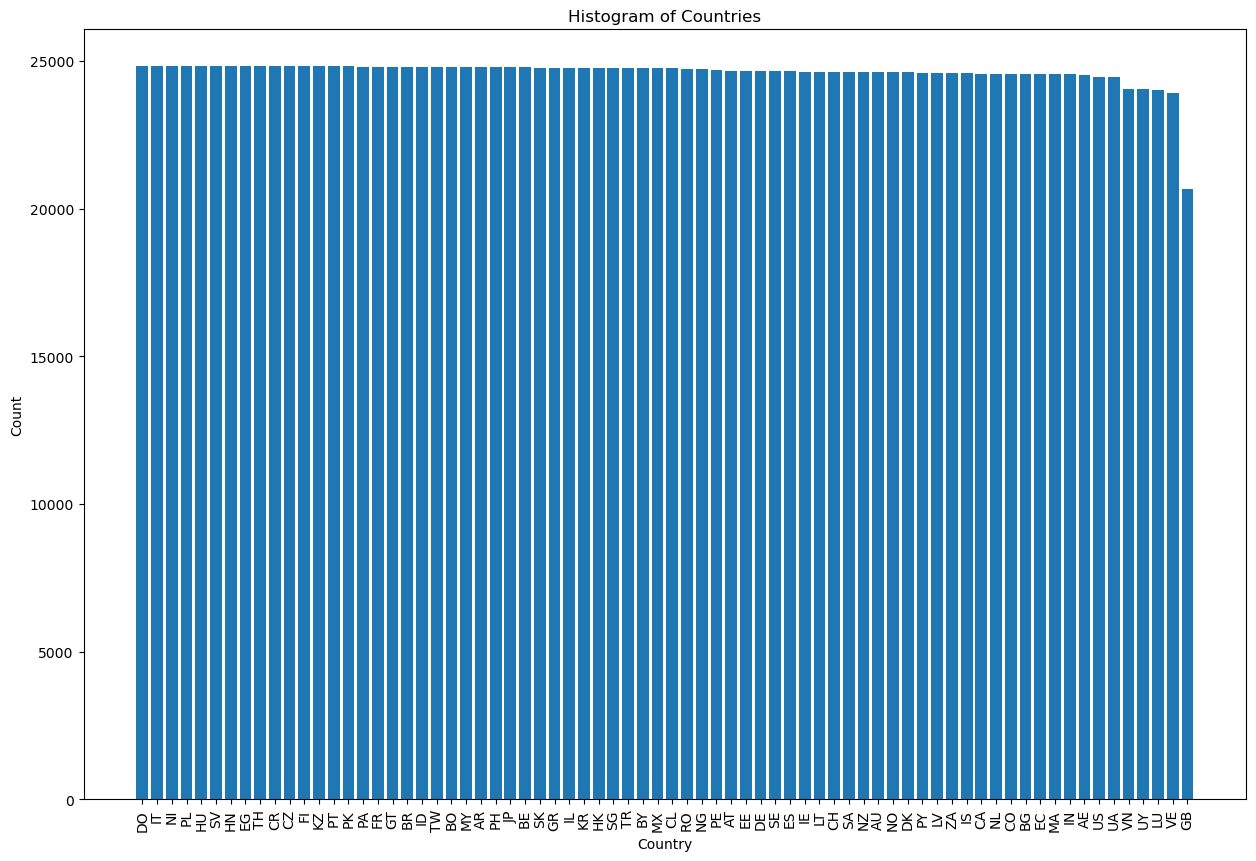

In [21]:
plt.figure(figsize=(15, 10))
plt.bar(count_countries.index, count_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Histogram of Countries')
plt.xticks(rotation=90)
plt.show()

In [22]:
spotify_df = spotify_df.drop('spotify_id', axis=1)

In [25]:
spotify_df = spotify_df.dropna(subset=['name', 'artists'])
spotify_df.isnull().sum()

name                      0
artists                   0
daily_rank                0
daily_movement            0
weekly_movement           0
country               24557
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              791
album_release_date      629
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [26]:
spotify_df['country'] = spotify_df['country'].fillna('Unknown')
spotify_df.isnull().sum()

name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name            791
album_release_date    629
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [27]:
spotify_df = spotify_df.rename(columns={'name': 'song_name'})

In [28]:
spotify_df = spotify_df.dropna(subset=['album_name'])
spotify_df.isnull().sum()

song_name             0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [29]:
spotify_clean = spotify_df

In [30]:
spotify_clean.to_csv(
    "gs://edosa_spotify_project/cleaned/spotify_clean.csv",
    index=False
)

In [31]:
files = fs.ls('edosa_spotify_project/cleaned')

# Print the full GCS paths
for f in files:
    print(f"gs://{f}")

gs://edosa_spotify_project/cleaned/null
gs://edosa_spotify_project/cleaned/spotify_clean.csv
